<a href="https://colab.research.google.com/github/mathcarl/Introduction-to-Data-Science/blob/main/Statistics_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 5768 - Data Science - Dr. Marques - Fall 2020
Student name: Jean Perez Nieves

# Assignment 3: Statistics and Probability Distributions
## STARTER 

### Goals 

- To transition from data analytics to basic statistical analysis.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets. 
- To practice the computation and displaying of summary statistics, percentiles, PMFs and (E)CDFs.
- To display and interpret bee swarm plots and box-and-whisker plots.
- To visualize and compute pairwise correlations among variables in the dataset.
- To practice the computation and displaying of representative statistical distributions.
- To compute moments and skewness measures.
- To estimate the parameters of a distribution and propose a model that explains the underlying data.

### Instructions

- This assignment is structured in four parts, each using their own dataset(s).
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- The number of points is indicated next to each part. They add up to 100.
- There are additional (20 points worth of) bonus items, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 


---------
### Imports + Google Drive

In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import scipy.stats as ss
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


-------------------
## Part 1: The Iris dataset

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Histogram and summary statistics 

The code below can be used to display the histogram of versicolor petal lengths (with meaningful labels for the axes and default option for number of bins). 

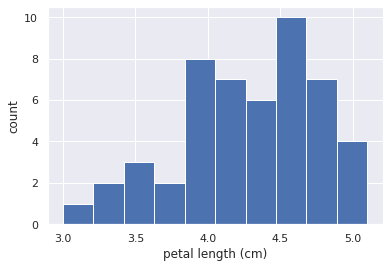

In [ ]:
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

### 1.1 Your turn! (6 points)

Write code to:

1. Modify the histogram above, this time using the "square root rule" for the number of bins. (2 pts)

*The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.*

2. Modify the histogram above, such that the y axis shows probability/proportion (rather than absolute count), i.e., a proper PMF. (2 pts) 

3. Compute summary statistics (1 pt each): mean and standard deviation 

Text(0, 0.5, 'count')

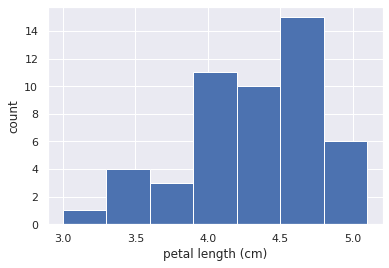

In [ ]:
#1
modata=len(versicolor_petal_length) # find the length of the data
mobins=np.sqrt(modata) # sqrt the len of the data
mobins=int(mobins) # bring integers for x values
plt.hist(versicolor_petal_length,bins=mobins) # plot the hist and modify the bins
plt.xlabel('petal length (cm)') # label the x axes
plt.ylabel('count')

Text(0, 0.5, 'Probability')

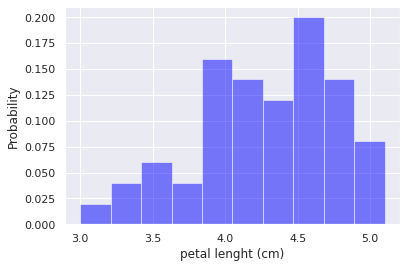

In [ ]:
#2
# ones_like=Return an array of ones with the same shape and type as a given array
# Devide by the number of samples to find the weight
weights=np.ones_like(versicolor_petal_length)/len(versicolor_petal_length) 
plt.hist(versicolor_petal_length,weights=weights,color='blue',alpha=.5)
plt.xlabel('petal lenght (cm)')
plt.ylabel('Probability')

In [ ]:
#3
#Find the mean and the standard deviation
versicolor_petal_length.aggregate(['mean','std'])


mean    4.260000
std     0.469911
Name: petal_length, dtype: float64

### 1.2 Your turn! (3 points)

Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species (properly labeld), and the y-axis the petal lengths. 

Your plot should look like this:

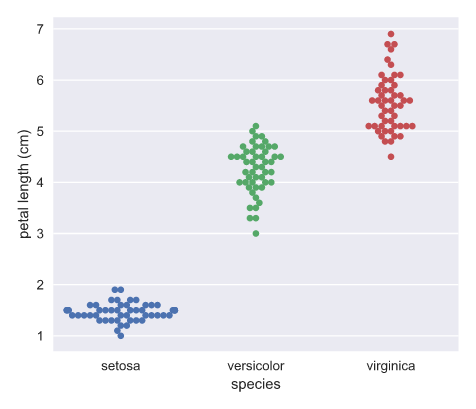


Text(0.5, 0, 'Species')

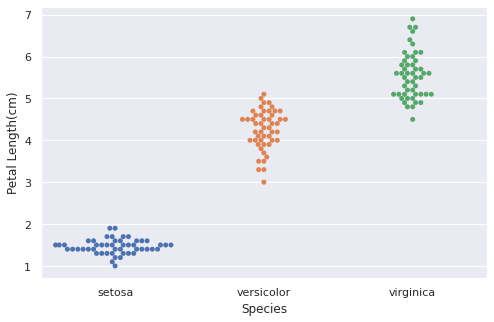

In [ ]:
#solution
plt.figure(figsize=(8,5)) # resize  data point so all can be placed in the plot
ax=sns.swarmplot(x="species", y="petal_length", data=iris)
ax.set_ylabel('Petal Length(cm)')
ax.set_xlabel('Species')



### Empirical Cumulative Distribution Function (ECDF)

The function below takes as input a 1D array of data and then returns the x and y values of the ECDF.

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### 1.3 Your turn! (6 points)

Use the ``ecdf()`` function above to compute the ECDF for the petal lengths of the Iris versicolor flowers (3 pts) and plot the resulting ECDF (3 pts).

Your plot should look like this:

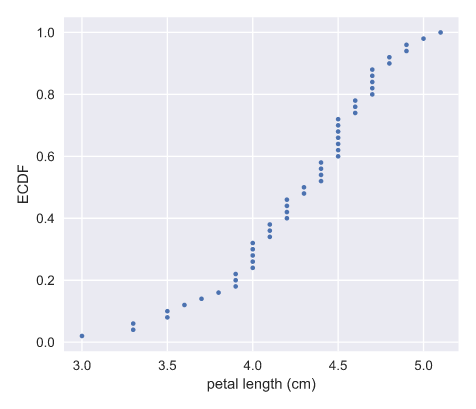

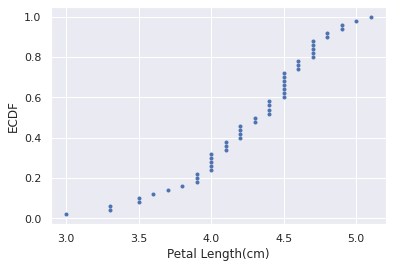

In [ ]:
#Answer 1.3
x,y=ecdf(versicolor_petal_length)# call the function provided
plt.scatter(x,y,marker='.')
plt.xlabel('Petal Length(cm)')
plt.ylabel('ECDF')
plt.show()

### 1.4 Your turn! (4 points)

Write code to plot ECDFs for the petal lengths of all three iris species.

Your plot should look like this:

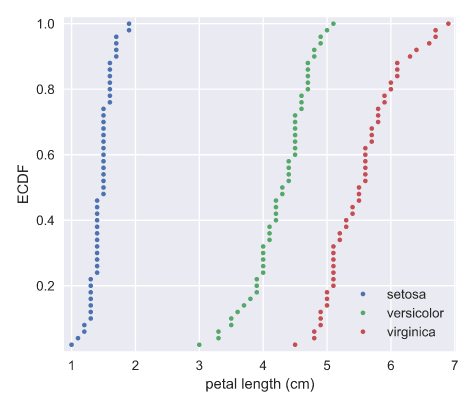

Text(0, 0.5, 'ECDF')

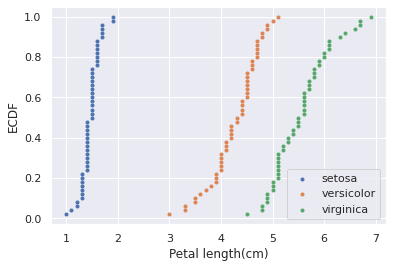

In [ ]:
 # answer 1.4
 setosa_length = iris[iris.species == "setosa"].petal_length
 versicolor_length =  iris[iris.species == "versicolor"].petal_length
 virginica_length = iris[iris.species == "virginica"].petal_length

 # generate x and y values for ecdf
 x_setosa,y_setosa = ecdf(setosa_length)
 x_versicolor,y_versicolor = ecdf(versicolor_length)
 x_virginica,y_virginica = ecdf(virginica_length)

 #scatter the ecdf as dots
 plt.scatter(x_setosa,y_setosa,marker='.')
 plt.scatter(x_versicolor,y_versicolor,marker='.')
 plt.scatter(x_virginica,y_virginica,marker='.')

 #label axes 
 plt.legend(("setosa","versicolor","virginica"))
 plt.xlabel("Petal length(cm)")
 plt.ylabel("ECDF")


### Percentiles

The code below computes the 25th, 50th, and 75th percentiles for the petal lengths of the Iris versicolor species and overlays the results on top of the ECDF.

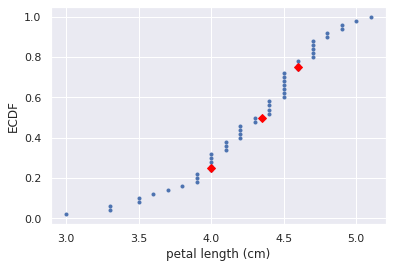

In [ ]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
ptiles_versicolor = np.percentile(versicolor_petal_length, percentiles)

# Plot the ECDF
x_vers, y_vers = ecdf(versicolor_petal_length)
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

### 1.5 Your turn! (5 points)

Write code to compute the 25th, 50th, and 75th percentiles for the petal lengths of and plot the resulting values overlaid with the corresponding ECDFs for all three iris species.

Text(0, 0.5, 'ECDF')

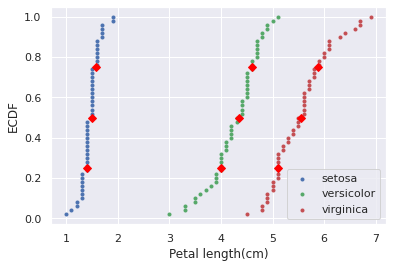

In [ ]:
 setosa_length = iris[iris.species == "setosa"].petal_length
 versicolor_length =  iris[iris.species == "versicolor"].petal_length
 virginica_length = iris[iris.species == "virginica"].petal_length
# create percentile
percentiles = np.array([25, 50, 75])
# generate x and y values for ecdf
 x_setosa,y_setosa = ecdf(setosa_length)
 x_versicolor,y_versicolor = ecdf(versicolor_length)
 x_virginica,y_virginica = ecdf(virginica_length)
#compute percentile
setosa_per = np.percentile(setosa_length, percentiles)
versicolor_per = np.percentile(versicolor_length,percentiles)
virginica_per = np.percentile(virginica_length,percentiles)

 #scatter the ecdf as dots
 plt.scatter(x_setosa,y_setosa,marker='.',color='b',label="setosa")
 plt.scatter(x_versicolor,y_versicolor,marker='.',color='g',label='versicolor')
 plt.scatter(x_virginica,y_virginica,marker='.',color='r',label='virginica')
# overlay percentiles
_ = plt.plot(setosa_per, percentiles/100, marker='D', color='red',
         linestyle='none')
_ = plt.plot(versicolor_per, percentiles/100, marker='D', color='red',
         linestyle='none')
_ = plt.plot(virginica_per, percentiles/100, marker='D', color='red',
         linestyle='none')
 #label axes 
 plt.legend()
 plt.xlabel("Petal length(cm)")
 plt.ylabel("ECDF")


### Box-and-whisker plots

Box-and-whisker plots (or simply box plots) show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

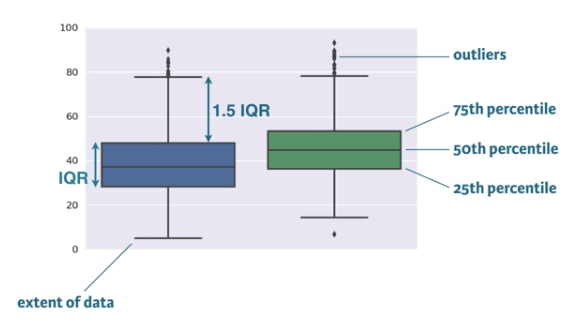


### 1.6 Your turn! (5 points)

Write code to display the box-and-whisker plot for the petal lengths of all three iris species.

Your plot should look like this:

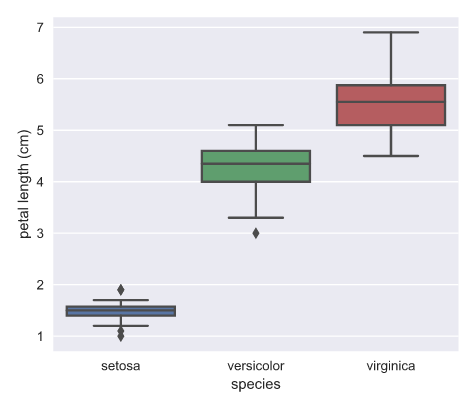

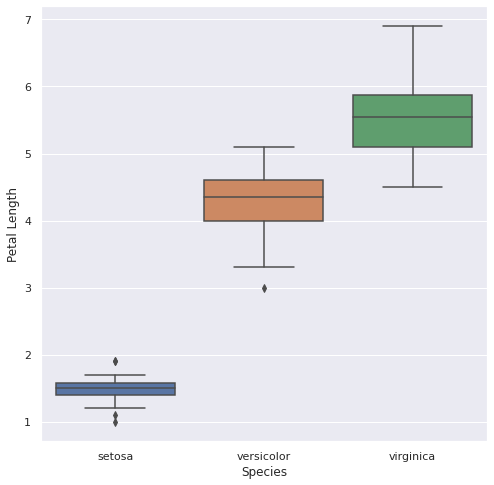

In [ ]:
# boxplot for each species
plt.figure(figsize=(8,8))
sns.boxplot(x="species",y="petal_length",data=iris)
plt.ylabel("Petal Length")
plt.xlabel("Species")
plt.show()

### 1.7 Bonus! (5 points)

Write code to display the box-and-whisker plot combined with the bee swarm plot for the petal lengths of all three iris species.

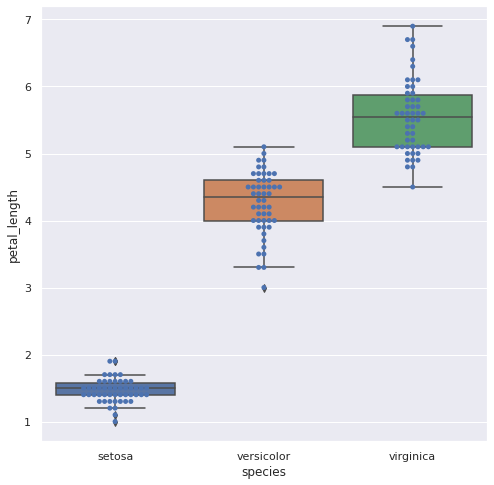

In [ ]:
#1.7 bonus
plt.figure(figsize=(8,8)) # size of plot
sns.boxplot(x='species',y='petal_length',data=iris)
sns.swarmplot(x='species',y='petal_length',data=iris,color='b')

### Scatter plots, pair plots, and correlation between two variables

The code below:

1. Displays the pair plots for all (4) attributes for all (3) categories / species / classes in the Iris dataset.
2. Computes the covariance matrix for the versicolor species.
3. Computes the Pearson correlation coefficient between petal length and petal width for the versicolor species.


Pearson correlation coefficient between petal length and petal width for versicolor species: 0.78667


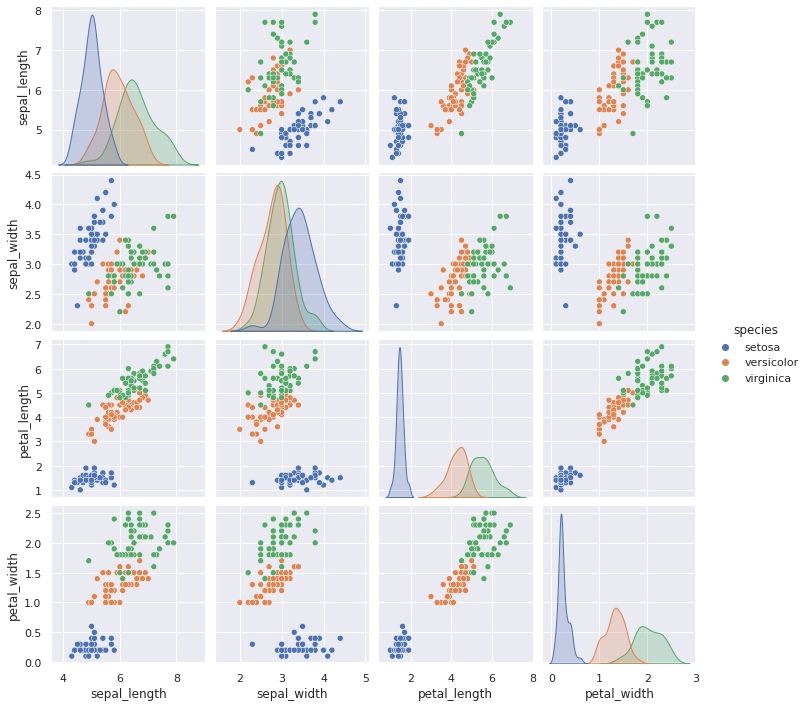

In [ ]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Compute 1D arrays for petal length and width
versicolor_petal_width = iris[iris.species == 'versicolor'].petal_width
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print('Pearson correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(r))

### 1.8 Bonus! (5 points)

Extend the code above to compute the Pearson correlation coeficients for all pair-wise combinations of all three Iris species and display the results in a table format.  

In [ ]:
# Enter your code here
# ...

-------------------
## Part 2: Empirical distributions vs. analytic distributions

### Representative analytic distributions

In this part we will look at how to generate and plot analytic distributions.

The Python code below generates and plots the PDF and CDF of a normal (Gaussian) distribution whose parameters are *mu* and *sigma*.

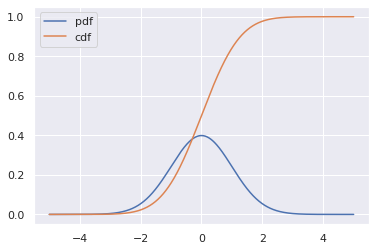

In [ ]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend();

### 2.1 Your turn! (6 points, i.e., 3 pts each)

Write code to:

1. Plot the PDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot. 
They will probably look like this:

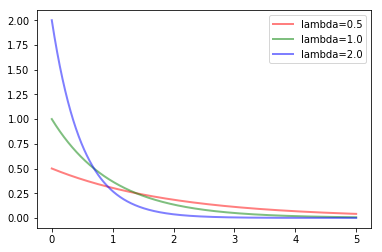

2. Plot the CDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot.

They will probably look like this:

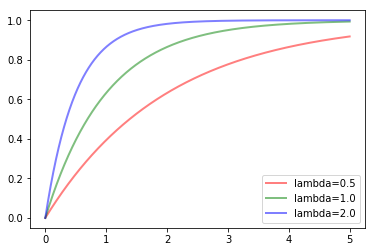

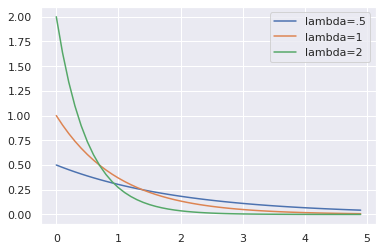

In [ ]:
# plot exponential Probability density function
x = np.arange(0, 5, 0.1)
# use formula to compute pdf
y_1 = .5 * np.exp(-.5 * x) # could also use stats.expon.pdf
y_2 = 1 * np.exp(-1*x)    
y_3 = 2 * np.exp(-2*x)

plt.plot(x,y_1,label="lambda=.5")
plt.plot(x,y_2,label="lambda=1")
plt.plot(x,y_3,label="lambda=2") 
plt.legend()
plt.show()  

   

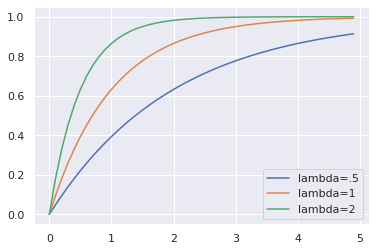

In [ ]:
# exponential cumulative density function
x = np.arange(0, 5, 0.1)
#used formula to compute CDF
y_1=1 - np.exp(-.5*x) 
y_2=1- np.exp(-1*x)
y_3=1-np.exp(-2*x)

plt.plot(x,y_1,label="lambda=.5")
plt.plot(x,y_2,label="lambda=1")
plt.plot(x,y_3,label="lambda=2")
plt.legend()
plt.show()


### How well can we model empirical distributions with analytic distributions?

Let's start by asking the question **Are the Belmont Stakes results normally distributed?**

*For context: Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. These two outliers have been removed from the data set, which has been obtained by scraping the Belmont Wikipedia page.* (The file ``belmont.csv`` is available on Canvas, if you want to learn more about the race's results.)

The code below:
- computes mean and standard deviation of Belmont winners' times with the two outliers removed.
- takes 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- computes the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.
- plots the CDF of your samples with the ECDF, with labeled axes.

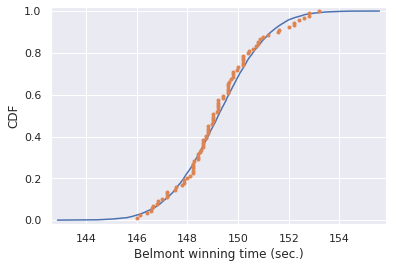

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

belmont_no_outliers = np.array([148.51,  146.65,  148.52,  150.7,  150.42,  150.88,  151.57,
                                147.54,  149.65,  148.74,  147.86,  148.75,  147.5,  148.26,
                                149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
                                152.02,  146.82,  149.97,  146.13,  148.1,  147.2,  146.,
                                146.4,  148.2,  149.8,  147.,  147.2,  147.8,  148.2,
                                149.,  149.8,  148.6,  146.8,  149.6,  149.,  148.2,
                                149.2,  148.,  150.4,  148.8,  147.2,  148.8,  149.6,
                                148.4,  148.4,  150.2,  148.8,  149.2,  149.2,  148.4,
                                150.2,  146.6,  149.8,  149.,  150.8,  148.6,  150.2,
                                149.,  148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
                                152.2,  148.2,  149.2,  151.,  149.6,  149.6,  149.4,
                                148.6,  150.,  150.6,  149.2,  152.6,  152.8,  149.6,
                                151.6,  152.8,  153.2,  152.4,  152.2])

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Seed random number generator
np.random.seed(42)

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


### 2.2 Bonus! (10 points)

Let's try to answer the question: **What are the chances of a horse matching or beating Secretariat's record?**

Assuming that the Belmont winners' times are Normally distributed (with the 1970
and 1973 years removed), write Python code to answer the question: *What is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?*

Instructions:
- Take 1,000,000 samples from the normal distribution using the ``np.random.normal()`` function.
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``belmont_no_outliers`` array. 
- Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.
- Print the result.


In [ ]:
# Enter your code here
# ...

### 2.3 Your turn (15 points)

Let's investigate whether the speed of light measurements by Michelson are normally distributed.

The dataset (``michelson_speed_of_light.csv``) is available on Canvas. 

_Hint_: You are only interested in the *velocity of light in air (km/s)* column.

You should follow a similar sequence of steps as above, namely:
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``michelson_speed_of_light`` array. 
- Take 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- Compute the CDF of the theoretical samples and the ECDF of the Michelson speed of light data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
- Plot the CDF of your samples with the ECDF, with labeled axes.

For more on Michelson: https://en.wikipedia.org/wiki/Albert_A._Michelson

In [ ]:
michelson= pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/michelson_speed_of_light.csv')

In [ ]:
#michelson.head()

In [ ]:
# extract velocity column from data
michelson_vel = michelson["velocity of light in air (km/s)"]
michelson_vel.head()
len(michelson_vel)

100

In [ ]:
#compute the meand and the standard deviation
mu = np.mean(michelson_vel)
sigma = np.std(michelson_vel)
print(f" The velocity mu is {mu} and the sigma {sigma}. ")

 The velocity mu is 299852.4 and the sigma 78.61450247886843. 


In [ ]:
#Sample out of a normal distribution with this mu and sigma: samples
sample_norm=np.random.normal(mu,sigma,10000)
print(sample_norm)

[299799.06047433 299828.3833117  299805.4371851  ... 299882.14410906
 299987.10828715 299725.05081062]


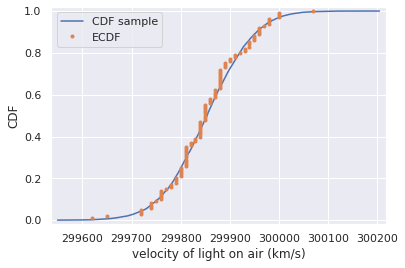

In [ ]:
#Compute the CDF of the theoretical samples and the ECDF of the Michelson speed of light data, 
#assigning the results to x_theor, y_theor and x, y, respectively.

x_theor,y_theor=ecdf(sample_norm) # compute cdf for the samples
x,y = ecdf(michelson_vel) # compute the cdf for the original data
#Plot the CDF of your samples with the ECDF, with labeled axes.
plt.plot(x_theor,y_theor,label="CDF sample")
plt.plot(x,y,marker='.',linestyle="none",label="ECDF")
plt.xlabel("velocity of light on air (km/s)")
plt.ylabel("CDF")
plt.legend()
plt.margins(.02)
plt.show()

------
## Part 3: Events over time

Next, let's turn our attention to baby births.

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called *interarrival times*. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

We will use the dataset from ``babies_brisbane.csv`` containing information about the time of birth for  44 babies born in a hospital in Brisbane, Australia, on December 18, 1997, as reported in the local paper. 



### 3.1: Your turn! (15 points)

You should write code to:
1. Read the data and build a Pandas dataframe.
2. Compute the reciprocal of the mean of the sample exponential distribution (call this ``lam``, since ``lambda`` is a reserved word in Python).
3. Take 10,000 samples out of an exponential distribution with this scale using
``np.random.exponential()``.
4. Compute the CDF of the theoretical samples and the ECDF of the sample data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
5. Plot the CDF of your samples with the ECDF, with labeled axes.
6. Compute the Complementary CDF (CCDF) and plot the CCDF for both theoretical and sample values, on a log-y scale. 

In [ ]:
brisbane= pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/babies_brisbane.csv')

In [ ]:
brisbane.head()

,Unnamed: 0,time,sex,weight_g,minutes
0,0,5,1,3837,5
1,1,104,1,3334,64
2,2,118,2,3554,78
3,3,155,2,3838,115
4,4,257,2,3625,177


In [ ]:
#Compute the reciprocal of the mean of the sample exponential distribution 
#(call this lam, since lambda is a reserved word in Python).
interarrival= brisbane.minutes.diff()
lam= 1/np.mean(interarrival)
meanb=np.mean(interarrival)
print(meanb,lam)

33.25581395348837 0.03006993006993007


In [ ]:
#Take 10,000 samples out of an exponential distribution with this 
#scale using np.random.exponential()
sampleb=np.random.exponential(1/lam,10000)


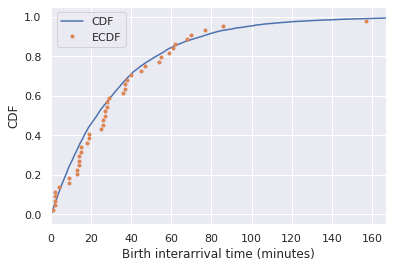

In [ ]:
#Compute the CDF of the theoretical samples and the ECDF of the sample data,
# assigning the results to x_theor, y_theor and x, y, respectively.

x_theor,y_theor = ecdf(sampleb)
x,y = ecdf(interarrival)
#Plot the CDF of your samples with the ECDF, with labeled axes.
plt.plot(x_theor,y_theor,label="CDF")
plt.plot(x,y,marker='.',linestyle='none',label="ECDF")
plt.xlabel("Birth interarrival time (minutes)")
plt.ylabel("CDF")
plt.legend()
plt.xlim((0,np.max(interarrival)+10))# plot within the range
plt.show()


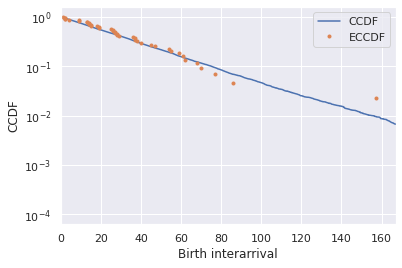

In [ ]:
#Compute the Complementary CDF (CCDF) and plot 
#the CCDF for both theoretical and sample values, on a log-y scale.
# evaluate the complementary cdf, i.e. (1 - cdf)
plt.plot(x_theor,1-y_theor,label="CCDF")
plt.plot(x,1-y,marker='.',linestyle="none",label="ECCDF")
plt.xlim((0,np.max(interarrival)+10))
plt.yscale('log')
plt.legend()
plt.xlabel("Birth interarrival")
plt.ylabel("CCDF")
plt.show()


-------------------
## Part 4: Moments and skewness

Let's revisit the dataset of salaries from Assignment 2 and use it to measure skewness.

### 4.1 Your turn! (10 points)

Write Python code to:
1. Read the `salaries.csv` file, compute the median and mean salary for the entire sample.
2. Compute the first raw moment and show that it is equivalent to computing the mean value.
3. Compute the second central moment and show that it is equivalent to computing the variance.
4. Compute the skewness using ``scipy.stats.skew``

In [ ]:
salaries=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/salaries.csv')
salaries=pd.DataFrame(salaries)
salaries.head()

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


In [ ]:
#4.13 mean and the median for the entire sample
salaries['earn'].aggregate(['mean','median'])

mean      23154.77349
median    20000.00000
Name: earn, dtype: float64

In [ ]:
#compute the first raw moment and show that it is equivalent to computing the mean value.
#The n-th moment about zero of a probability density function 
#f(x) is the expected value of Xn and is called a raw moment
mean=salaries['earn'].mean()
first_moment=(sum(salaries['earn'])/len(salaries['earn']))#Moment for r=1
print(f'The first raw moment {first_moment} = The mean of the data {mean}')

The first raw moment 23154.773489932886 = The mean of the data 23154.773489932886


In [ ]:
from scipy.stats import moment
#compute the central moment and show the it is equivalent to computing the variance
#The moments about its mean μ are called central moments; 
#these describe the shape of the function, independently of translation.
central=moment(salaries['earn'],moment=2)

var=np.var(salaries['earn'])
print(f'The second central moment {central} is equal to the variance {var}.')

The second central moment 378852251.6248677 is equal to the variance 378852251.6248667.


In [ ]:
#compute the skewness
from scipy.stats import skew
import pylab as p
skew(salaries['earn'])

2.880309741267592

This distribution has skew 2.883940129871989


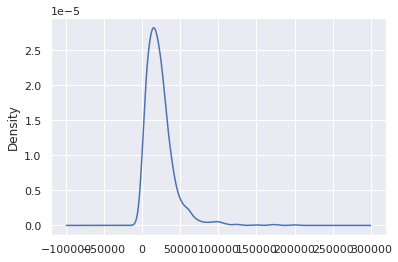

In [ ]:
salaries['earn'].plot(kind='density')
print('This distribution has skew',salaries['earn'].skew())

### Questions (9 points, 3 pts each)

1. Explain the "binning bias" associated with histogram plots.

2. What is a bee swarm plot and in which situations should you (not) use it?

3. How do you interpret the value of skewness computed by your code in Part 4?

1. *Binning data is the process of transforming numerical data into categorical counterparts.However, we introduce bias when the bins are of different sizes thus changing the visualization of the distribution.*
2. *Bee swarm plots all the data points without any overlapping positions. This gives the appearance of a swarm of bees. Bee swarm can be used during exploratory analysis and visualize the max,min,mean,median, and outliers. it is best used when dealing with a small number of data. On the contrary, is not useful when working with big data set.*
3. *skewness between -.5 and .5 the data is fairly symmetrical. However, our data is 2.9 meaning is highly skewed to the right.*

### Conclusions (16 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

1. Enforced previous skill learned from class such as summary statistics,data formatting, and plotting. New skill learned include computing percentiles, PMF, ECDF, boxplot, skenness, and plotting CDF and better understanding the data.
2. Part 1 was the most fun and time consuming. This part depending on how you coded gives you a great opportunity for learning from summary statistic to plotting different results.
3. Had plenty of time to learn and finish my work. If I had another week I'll probably make a more efficient code or use libraries in part 1.5. 